1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [6]:
from scipy.stats import poisson
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
import pandas as pd
import pickle

historic_average = 6.3
k = 15
probability_less_than_15 = poisson.cdf(k - 1, historic_average)
probability_15_or_more = 1 - probability_less_than_15

print(f"The probability of observing 15 or more hurricanes in a single year is: {probability_15_or_more*100:.2f}%")

The probability of observing 15 or more hurricanes in a single year is: 0.22%


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [7]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
differences = post - pre

mean_diff = np.mean(differences)
std_dev_diff = np.std(differences, ddof=1)

n = len(differences)

#calculate the t-statistic and p-value, also set an arbitrary value to check if the change was significant 
t = mean_diff / (std_dev_diff * (2 / np.sqrt(n)))
df = n - 1
p_value = stats.t.sf(np.abs(t), df) * 2 
value = 0.05

print(f"T-statistic: {t:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < value:
    print("The change in blood pressures within the sample is statistically significant.")
else:
    print("There is no statistically significant change in blood pressures within the sample.")

T-statistic: 3.2173
P-value: 0.0105
The change in blood pressures within the sample is statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

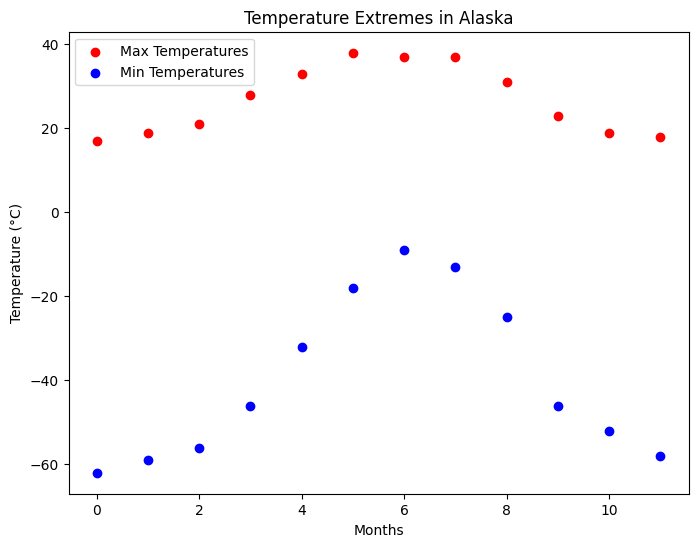

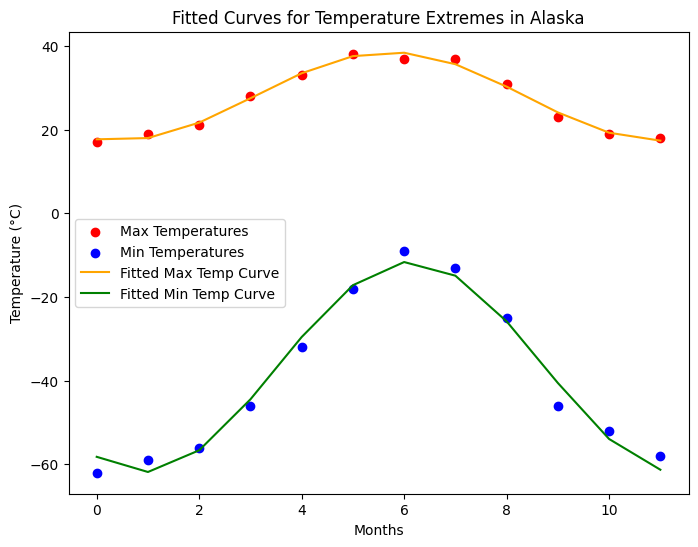

Fitted parameters for Max Temp: [10.5816995   0.59227426 10.74771477 27.9496356 ]
Fitted parameters for Min Temp: [ 25.14961897   0.6013213   -2.11710345 -36.71255336]


In [8]:
months = np.arange(12)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#1st plot the temperatures
plt.figure(figsize=(8, 6))
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

def fit_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

popt_max, _ = optimize.curve_fit(fit_func, months, max_temps, bounds=([0, 0.1, -np.pi, -np.inf], np.inf))
popt_min, _ = optimize.curve_fit(fit_func, months, min_temps, bounds=([0, 0, -np.pi, -np.inf], np.inf))

#ploting the temperatures + the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')
plt.plot(months, fit_func(months, *popt_max), color='orange', label='Fitted Max Temp Curve')
plt.plot(months, fit_func(months, *popt_min), color='green', label='Fitted Min Temp Curve')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Curves for Temperature Extremes in Alaska')
plt.legend()
plt.show()

print(f"Fitted parameters for Max Temp: {popt_max}")
print(f"Fitted parameters for Min Temp: {popt_min}")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [9]:
####I could not load successfully the data
# with open('data/residuals_261.pkl', 'rb') as file:
#     data = pickle.load(file)

# residuals = data['residual']


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Best-fit values of the parameters:
a: -9.988133689134516 +- 0.17961047334210886
b: 12.333023014196588 +- 0.01798305242276112
c: 9.38411486809072 +- 0.12700529122712614

Overall average temperature in Munich: 8.941907038598593°C
Coldest time of year: -0.6037388871173341°C
Hottest time of year: 19.372195568442642°C


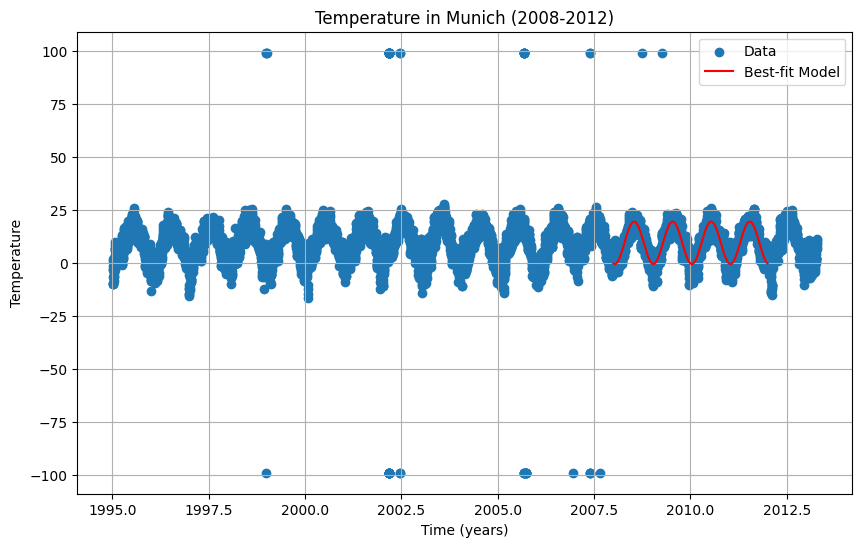

In [10]:
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')

# Extract time and temperature from the data
time = data[:, 0]
temperature = data[:, 1]

def model_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

plot_start_year = 2008
plot_end_year = 2012
mask = (time >= plot_start_year) & (time <= plot_end_year)

#fit the model to the data
params, covariance = optimize.curve_fit(model_function, time[mask], temperature[mask])

fit_time = np.linspace(plot_start_year, plot_end_year, 1000)
fit_temperature = model_function(fit_time, *params)

#best-fit parameter values and their errors
a_fit, b_fit, c_fit = params
a_uncertainty, b_uncertainty, c_uncertainty = np.sqrt(np.diag(covariance))

average_temperature = np.mean(temperature)
coldest_time = np.argmin(model_function(time, a_fit, b_fit, c_fit))
hottest_time = np.argmax(model_function(time, a_fit, b_fit, c_fit))

coldest_prediction = model_function(time[coldest_time], a_fit, b_fit, c_fit)
hottest_prediction = model_function(time[hottest_time], a_fit, b_fit, c_fit)

#results
print("Best-fit values of the parameters:")
print(f"a: {a_fit} +- {a_uncertainty}")
print(f"b: {b_fit} +- {b_uncertainty}")
print(f"c: {c_fit} +- {c_uncertainty}\n")

print(f"Overall average temperature in Munich: {average_temperature}°C")
print(f"Coldest time of year: {coldest_prediction}°C")
print(f"Hottest time of year: {hottest_prediction}°C")

plt.figure(figsize=(10, 6))
plt.scatter(time, temperature, label='Data')
plt.plot(fit_time, fit_temperature, label='Best-fit Model', color='red')
plt.title('Temperature in Munich (2008-2012)')
plt.xlabel('Time (years)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# The 'b' parameter in the model function represents the phase shift of the cosine model function.
# It determines how the cosine wave is shifted along the time axis. In the context of temperature modeling, can be set
# to represent the time of the year when the temperature reaches its maximum or minimum value.